In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("insurance_claims.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [5]:
# df.dtypes

In [6]:
# df.isnull().sum()

In [7]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [9]:
# create age group
df['agegrp'] = pd.cut(df['age'],[19,25,30,35,40,45,50,55,60,70])

In [10]:
#convert policy bind date to year and convert indident to month 
df['policy_bind_year'] = df['policy_bind_date'].apply(lambda x: x.split('-')[2])
df['incident_month'] = df['policy_bind_date'].apply(lambda x: x.split('-')[1])

In [11]:
df['incident_month'].value_counts()

12    95
08    93
07    91
02    90
11    85
01    83
04    83
06    80
03    79
10    78
09    74
05    69
Name: incident_month, dtype: int64

In [12]:
#convert time
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [13]:
# fill ? 
df['collision_type'] = df['collision_type'].apply(lambda x: x.replace("?","Noncollision"))
df['property_damage'] = df['property_damage'].apply(lambda x: x.replace('?','No_records'))
df['police_report_available'] = df['police_report_available'].apply(lambda x: x.replace('?','No_records'))

In [14]:
map_all_brand  = {'Suburu':'Jan','Nissan':'Jan','Toyota':'Jan','Accura':'Jan','Honda':'Jan','Dodge':'Ame','Chevrolet':'Ame',
                 'Ford':'Ame','Jeep':'Ame','BMW':'Ger','Audi':'Ger','Volkswagen':'Ger','Mercedes':'Ger'}
df['auto_make_country'] = df['auto_make'].map(map_all_brand)

In [15]:
Car_model = {'RAM':'Truck','Wrangler':'SUV','A3':'Sedan','Neon':'Sedan','MDX':'SUV',
'Jetta':'Sedan','Passat':'Sedan','A5':'Sedan','Legacy':'Sedan','Pathfinder':'SUV',
'Malibu':'Sedan','Camry':'Sedan','Forrestor':'SUV','92x':'Sedan','F150':'Truck',
'95':'Sedan','E400':'Sedan','93':'Sedan','Grand Cherokee':'SUV','Maxima':'Sedan',
'Tahoe':'SUV','Escape':'SUV','X5':'SUV','Ultima':'Supercar','Highlander':'SUV',
'Civic':'Sedan','Silverado':'Truck','Fusion':'Sedan','Impreza':'Sedan','Corolla':'Sedan',
'TL':'Sedan','ML350':'SUV','CRV':'SUV','C300':'Sedan','3 Series':'Sedan','X6':'SUV','M5':'Sedan',
'Accord':'Sedan','RSX':'Sedan'}
df['Car_model'] = df['auto_model'].map(Car_model)

In [16]:
# profit
df['capital_profit'] = df['capital-gains'] - df['capital-loss']

In [17]:
# filter out people not fraud
df_fraud = df[df['fraud_reported'] == 'Y']
df_notfraud = df[df['fraud_reported'] == 'N']

Text(0.5, 1.0, 'Fraud incident month')

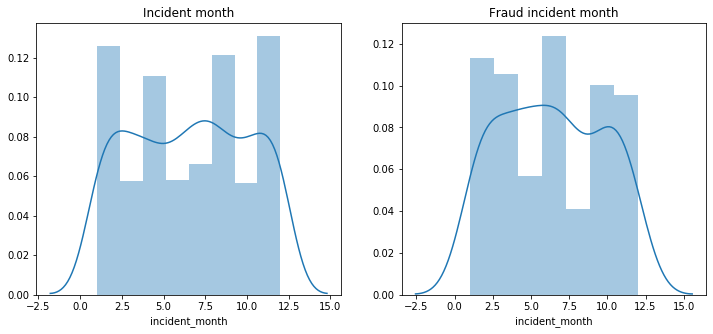

In [18]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df['incident_month']).set_title('Incident month')
plt.subplot(122)
sns.distplot(df_fraud['incident_month']).set_title('Fraud incident month')

Text(0.5, 1.0, 'Fraud incidents year')

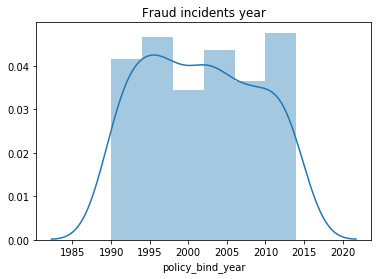

In [19]:
# plt.figure(figsize = (6,6))
sns.distplot(df_fraud['policy_bind_year']).set_title('Fraud incidents year')

Text(0.5, 1.0, 'Fraud people age')

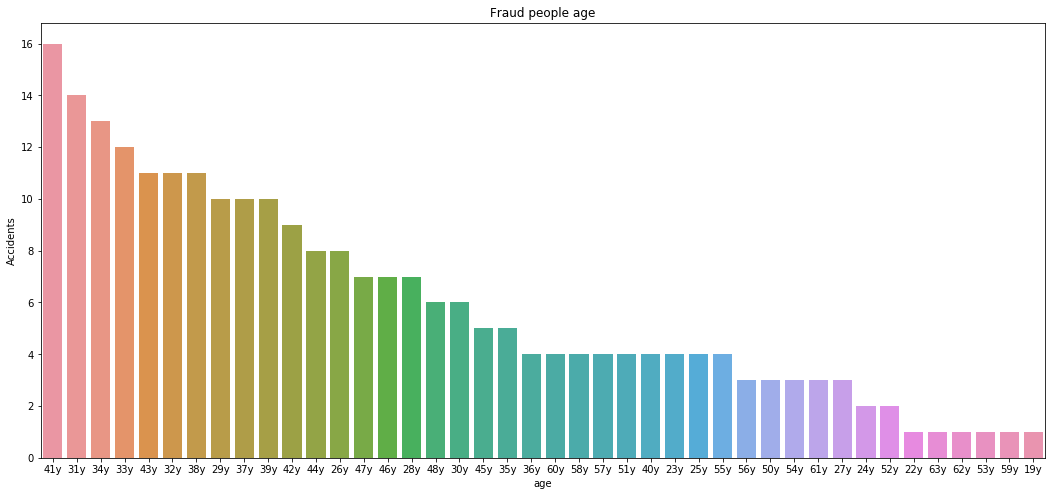

In [20]:
plt.figure(figsize=(18,8))
age = pd.DataFrame(df_fraud['age'].value_counts()).reset_index()
age.columns = ['age','Accidents']
age['age'] = age['age'].apply(lambda x: str(x)+'y')
sns.barplot(x = age['age'],y = age['Accidents']).set_title("Fraud people age")

Text(0.5, 1.0, 'Not_Fruad Age Group')

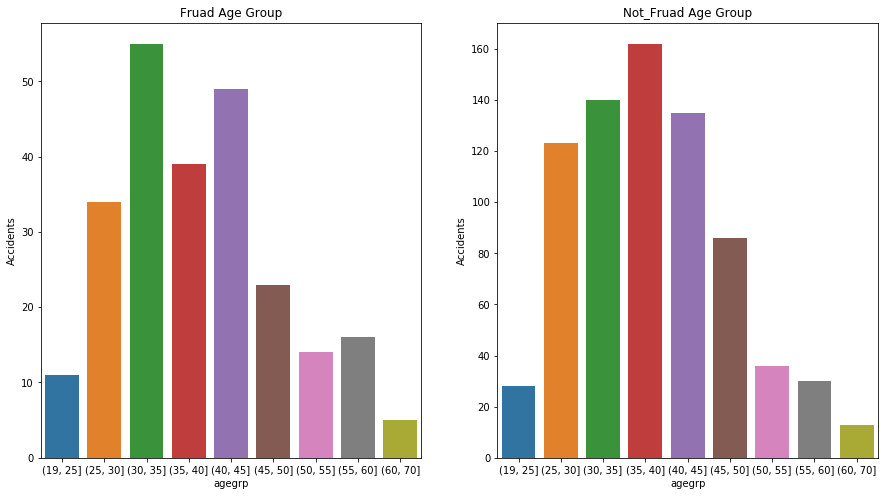

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(121)
age = pd.DataFrame(df_fraud['agegrp'].value_counts()).reset_index()
age.columns = ['agegrp','Accidents']
# age['agegrp'] = age['agegrp'].apply(lambda x: str(x)+'y')
sns.barplot(x = age['agegrp'],y = age['Accidents']).set_title('Fruad Age Group')
plt.subplot(122)
age_n = pd.DataFrame(df_notfraud['agegrp'].value_counts()).reset_index()
age_n.columns = ['agegrp','Accidents']
# age['agegrp'] = age['agegrp'].apply(lambda x: str(x)+'y')
sns.barplot(x = age_n['agegrp'],y = age_n['Accidents']).set_title('Not_Fruad Age Group')

Text(0.5, 1.0, 'Fruad by Gender')

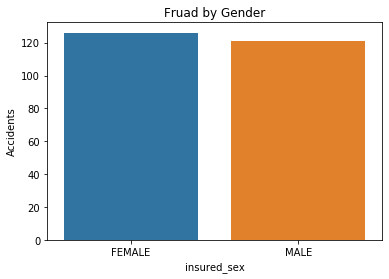

In [22]:
# plt.figure(figsize=(6,4))
gender = pd.DataFrame(df_fraud['insured_sex'].value_counts()).reset_index()
gender.columns = ['insured_sex','Accidents']
sns.barplot(x = gender['insured_sex'],y = gender['Accidents']).set_title('Fruad by Gender')

In [23]:
da = df_fraud.groupby(['agegrp','insured_sex'])['incident_severity'].value_counts().unstack()
da_1 = df_fraud.groupby(['agegrp','insured_sex'])['incident_type'].value_counts().unstack()
da_2 = df_fraud.groupby(['agegrp','insured_sex'])['collision_type'].value_counts().unstack()
da_1

incident_type         Multi-vehicle Collision  Parked Car  \
agegrp   insured_sex                                        
(19, 25] FEMALE                           4.0         NaN   
         MALE                             1.0         NaN   
(25, 30] FEMALE                           5.0         1.0   
         MALE                            12.0         NaN   
(30, 35] FEMALE                          14.0         3.0   
         MALE                             9.0         NaN   
(35, 40] FEMALE                          10.0         NaN   
         MALE                            10.0         NaN   
(40, 45] FEMALE                          12.0         1.0   
         MALE                            13.0         1.0   
(45, 50] FEMALE                           5.0         1.0   
         MALE                             7.0         NaN   
(50, 55] FEMALE                           1.0         NaN   
         MALE                             4.0         NaN   
(55, 60] FEMALE                           3.0         NaN   
         MALE                             1.0         NaN   
(60, 70] FEMALE                           3.0         NaN   
         MALE                             NaN         1.0   

incident_type         Single Vehicle Collision  Vehicle Theft  
agegrp   insured_sex                                           
(19, 25] FEMALE                            3.0            1.0  
         MALE                              2.0            NaN  
(25, 30] FEMALE                            7.0            NaN  
         MALE                              9.0            NaN  
(30, 35] FEMALE                           15.0            1.0  
         MALE                             12.0            1.0  
(35, 40] FEMALE                           12.0            1.0  
         MALE                              5.0            1.0  
(40, 45] FEMALE                           10.0            NaN  
         MALE                             11.0            1.0  
(45, 50] FEMALE                            4.0            NaN  
         MALE                              6.0            NaN  
(50, 55] FEMALE                            3.0            NaN  
         MALE                              4.0            2.0  
(55, 60] FEMALE                            5.0            NaN  
         MALE                              7.0            NaN  
(60, 70] FEMALE                            NaN            NaN  
         MALE                              1.0            NaN

Text(0.5, 1.0, 'Fraud incident_incident_type')

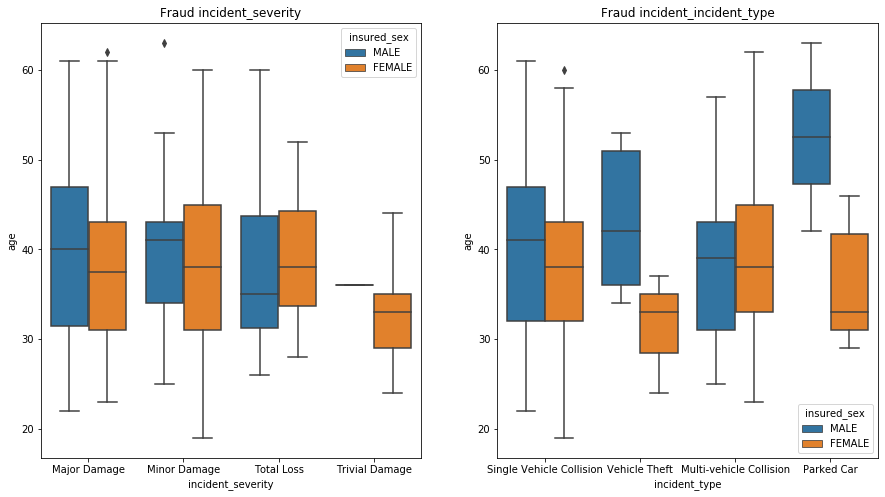

In [24]:
plt.figure(figsize = (15,8))
plt.subplot(121)
sns.boxplot(df_fraud['incident_severity'],df_fraud['age'],hue =df_fraud['insured_sex']).set_title('Fraud incident_severity')
plt.subplot(122)
sns.boxplot(df_fraud['incident_type'],df_fraud['age'],hue =df_fraud['insured_sex']).set_title('Fraud incident_incident_type')

Text(0.5, 1.0, 'Not_Fruad Accidentsy by automade')

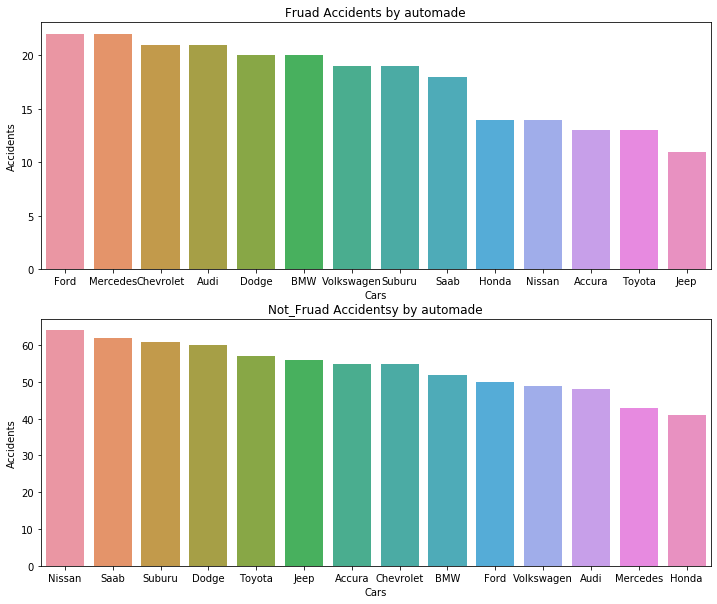

In [25]:
plt.figure(figsize = (12,10))
plt.subplot(211)
cars = pd.DataFrame(df_fraud['auto_make'].value_counts()).reset_index()
cars.columns = ['Cars', 'Accidents']
sns.barplot(x = 'Cars',y = 'Accidents', data = cars).set_title('Fruad Accidents by automade')
plt.subplot(212)
cars_n = pd.DataFrame(df_notfraud['auto_make'].value_counts()).reset_index()
cars_n.columns = ['Cars', 'Accidents']
sns.barplot(x = 'Cars',y = 'Accidents', data = cars_n).set_title('Not_Fruad Accidentsy by automade')

Text(0.5, 1.0, 'Not_Fruad Accidents by automade country')

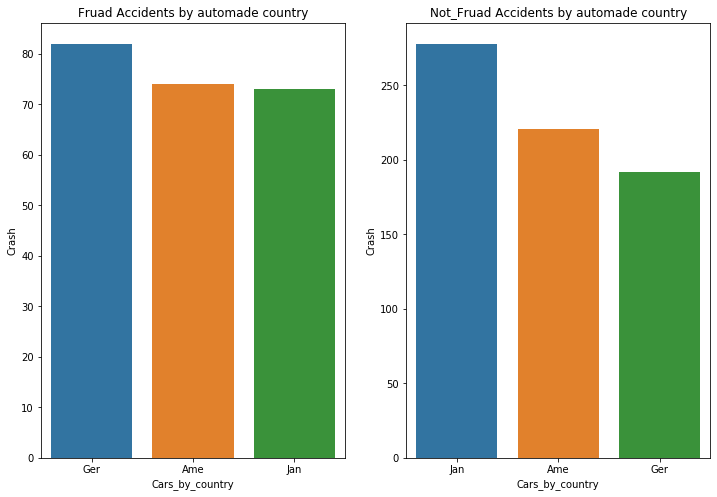

In [26]:
plt.figure(figsize = (12,8))
plt.subplot(121)
cars_country = pd.DataFrame(df_fraud['auto_make_country'].value_counts()).reset_index()
cars_country.columns = ['Cars_by_country', 'Crash']
sns.barplot(x = 'Cars_by_country',y = 'Crash', data = cars_country).set_title('Fruad Accidents by automade country')
plt.subplot(122)
cars_country_n = pd.DataFrame(df_notfraud['auto_make_country'].value_counts()).reset_index()
cars_country_n.columns = ['Cars_by_country', 'Crash']
sns.barplot(x = 'Cars_by_country',y = 'Crash', data = cars_country_n).set_title('Not_Fruad Accidents by automade country')

Text(0.5, 1.0, 'Body injuries by different car_make')

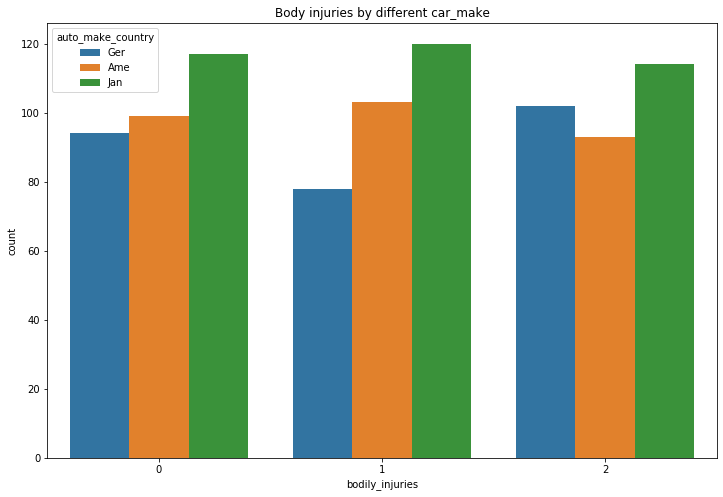

In [27]:
plt.figure(figsize = (12,8))
sns.countplot(df['bodily_injuries'],hue = df['auto_make_country']).set_title('Body injuries by different car_make')

Text(0.5, 1.0, 'Accident_prone_hour')

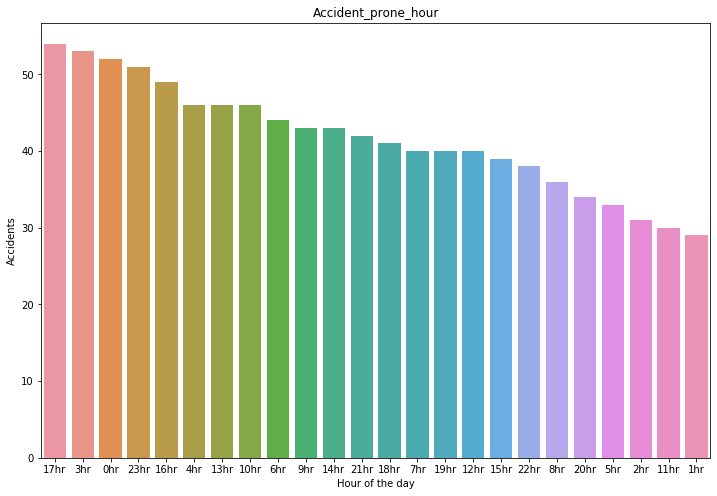

In [28]:
plt.figure(figsize= (12,8))
time = pd.DataFrame(df['incident_hour_of_the_day'].value_counts()).reset_index()
time.columns = ['Hour of the day','Accidents']
time['Hour of the day'] = time['Hour of the day'].apply(lambda x: str(x)+'hr')
sns.barplot(time['Hour of the day'],time['Accidents']).set_title('Accident_prone_hour')

In [29]:
df_fraud['insured_education_level'].value_counts()

JD             42
MD             38
High School    36
Associate      34
PhD            33
College        32
Masters        32
Name: insured_education_level, dtype: int64

In [30]:
df_fraud['insured_relationship'].value_counts()

other-relative    52
not-in-family     45
wife              42
own-child         39
husband           35
unmarried         34
Name: insured_relationship, dtype: int64

In [31]:
e = df_fraud.groupby(['insured_sex','insured_relationship'])['insured_hobbies'].value_counts().unstack()
e[['chess','cross-fit','reading']]

insured_hobbies                   chess  cross-fit  reading
insured_sex insured_relationship                           
FEMALE      husband                 4.0        2.0      1.0
            not-in-family           3.0        2.0      NaN
            other-relative          3.0        2.0      NaN
            own-child               3.0        1.0      2.0
            unmarried               2.0        3.0      NaN
            wife                    6.0        4.0      1.0
MALE        husband                 1.0        2.0      2.0
            not-in-family           4.0        1.0      2.0
            other-relative          2.0        6.0      3.0
            own-child               3.0        1.0      4.0
            unmarried               4.0        2.0      1.0
            wife                    3.0        NaN      1.0

In [32]:
# ee = pd.crosstab(df_fraud['insured_education_level'],df_fraud['insured_occupation'].isin(occupation_df.head(5)['Occupation']))
# # ee

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

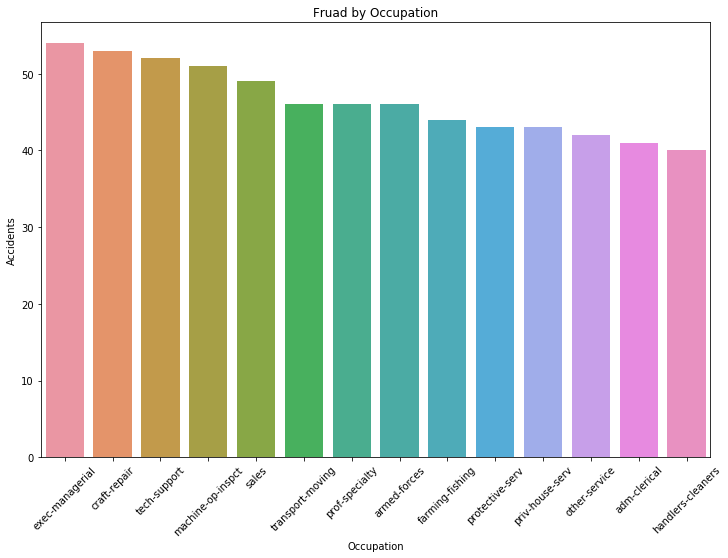

In [33]:
plt.figure(figsize= (12,8))
occupation_df = df_fraud['insured_occupation'].value_counts().reset_index()
occupation_df.columns = ['Occupation','Accidents']
sns.barplot(occupation_df['Occupation'],time['Accidents']).set_title('Fruad by Occupation')
plt.xticks(rotation=45)
# set_title('Fruad by Occupation')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

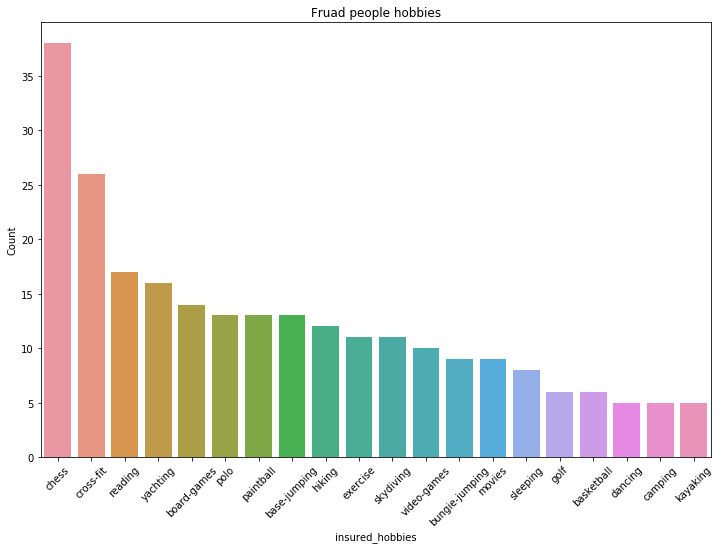

In [34]:
df_fraud['insured_hobbies'].value_counts()
plt.figure(figsize= (12,8))
hobby_df = df_fraud['insured_hobbies'].value_counts().reset_index()
hobby_df.columns = ['insured_hobbies','Count']
sns.barplot(hobby_df['insured_hobbies'],hobby_df['Count']).set_title('Fruad people hobbies')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Most fraud province')

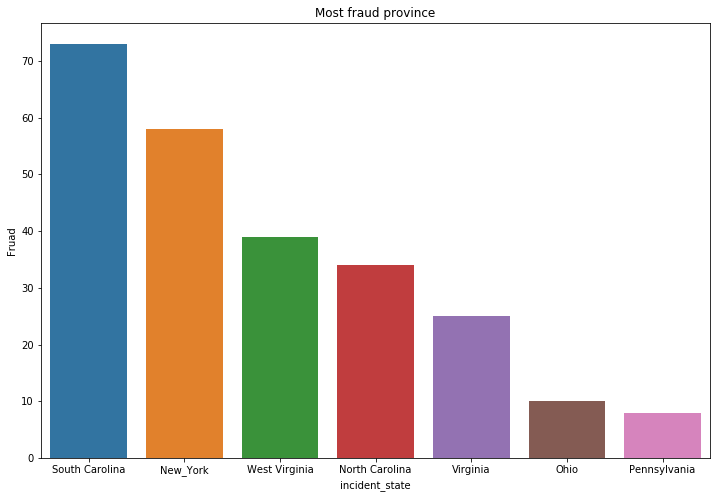

In [35]:
p = {'NY': 'New_York','SC':'South Carolina','WV':'West Virginia','VA':'Virginia','NC':'North Carolina',
     'PA':'Pennsylvania','OH':'Ohio'}
plt.figure(figsize= (12,8))
province = pd.DataFrame(df_fraud['incident_state'].value_counts()).reset_index()
province.columns = ['incident_state','Fruad']
province['incident_state'] = province['incident_state'].map(p)
sns.barplot(province['incident_state'],province['Fruad']).set_title('Most fraud province')

In [36]:
plt.figure(figsize= (12,8))
ctb = pd.crosstab(df_fraud['incident_state'],df_fraud['incident_city'])
ctb.index = ctb.index.map(p)
ctb

incident_city,Arlington,Columbus,Hillsdale,Northbend,Northbrook,Riverwood,Springfield
incident_state,,,,,,,
North Carolina,6,4,4,6,3,6,5
New_York,12,9,7,8,7,5,10
Ohio,4,1,0,1,2,1,1
Pennsylvania,0,1,1,0,2,2,2
South Carolina,12,17,12,9,5,6,12
Virginia,3,4,5,5,4,2,2
West Virginia,7,3,6,5,4,8,6


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Most Fraud Cities in different province')

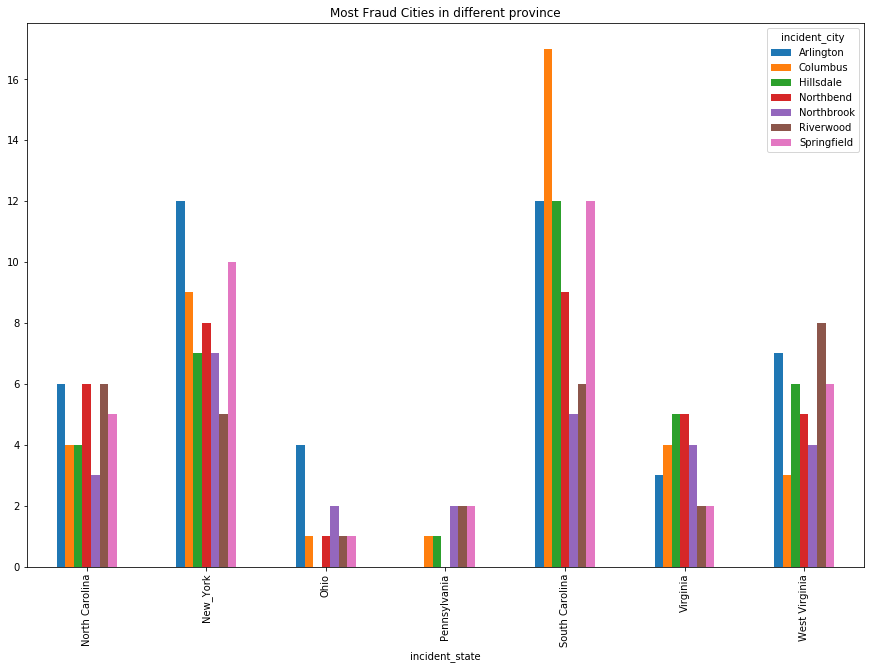

In [37]:
ctb.plot(kind = 'bar', stacked = False,figsize= (15,10)).set_title('Most Fraud Cities in different province')

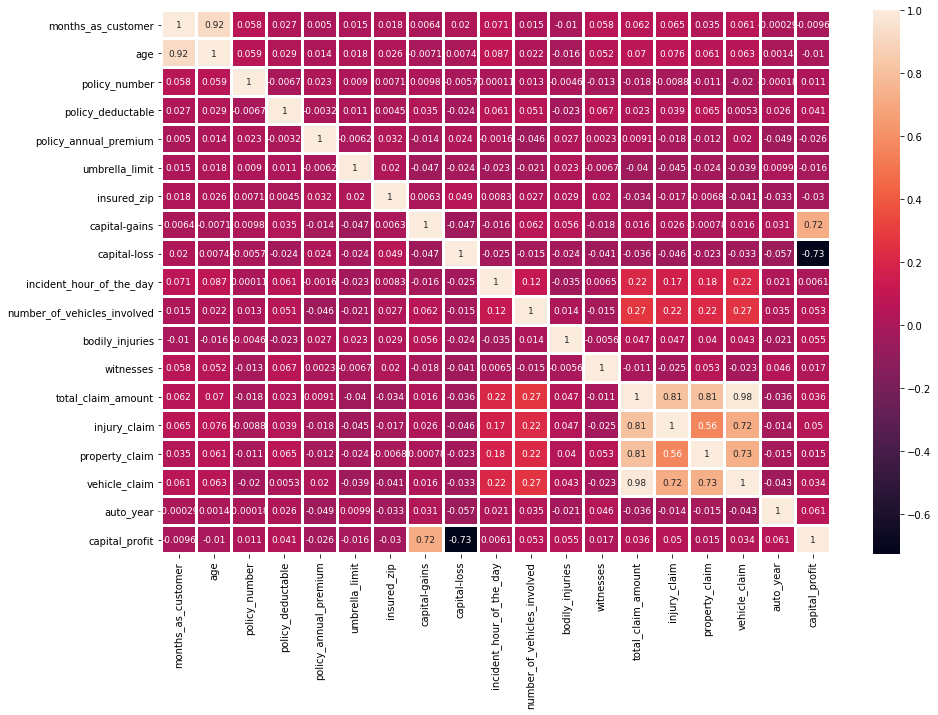

In [38]:
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot_kws = {'size':9},annot = True,linewidth = 2, xticklabels = 1)

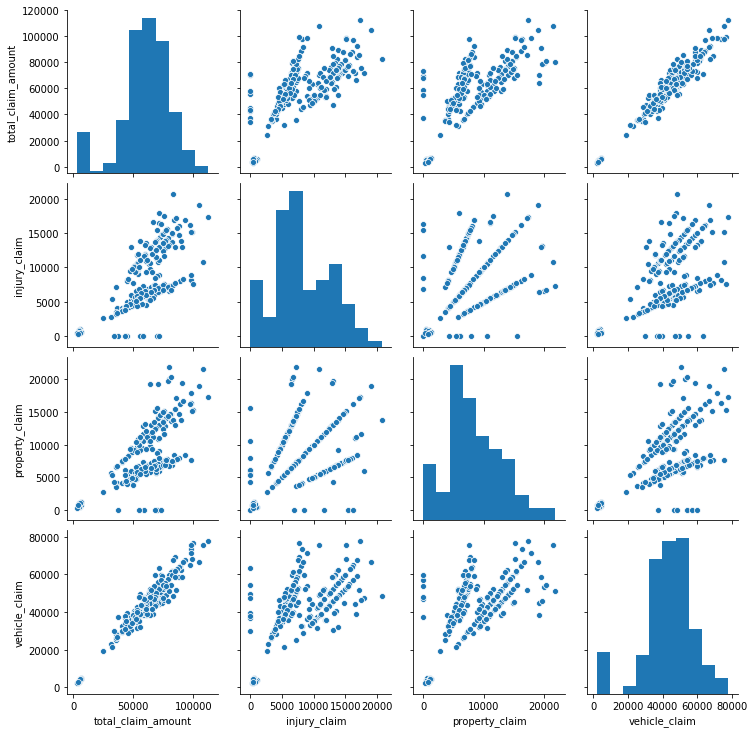

In [39]:
cols = ['total_claim_amount','injury_claim','property_claim','vehicle_claim']
sns.pairplot(df_fraud[cols])

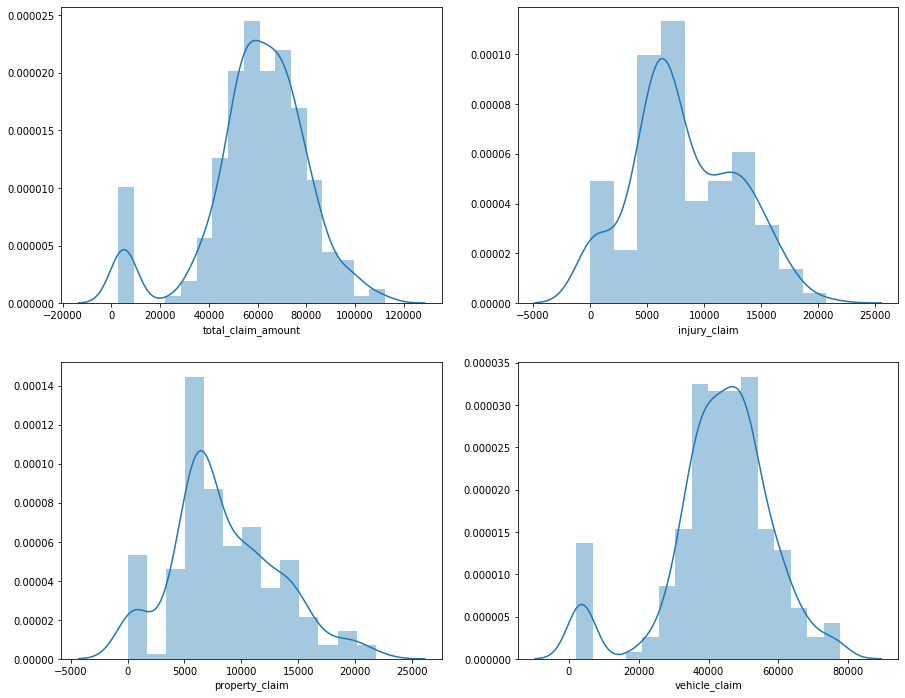

In [40]:
plt.figure(figsize=(15,12))
k = 1 
for i in cols:
    plt.subplot(2,2,k)
    sns.distplot(df_fraud[i])
    k = k+1

In [41]:
fraud_claim = pd.pivot_table(df_fraud, values = 'total_claim_amount', 
                             index = ['insured_occupation','insured_education_level']).sort_values(by ='total_claim_amount', ascending = False)
fraud_claim
cm = sns.light_palette("y", as_cmap=True)
fraud_claim.style.background_gradient(cmap=cm)

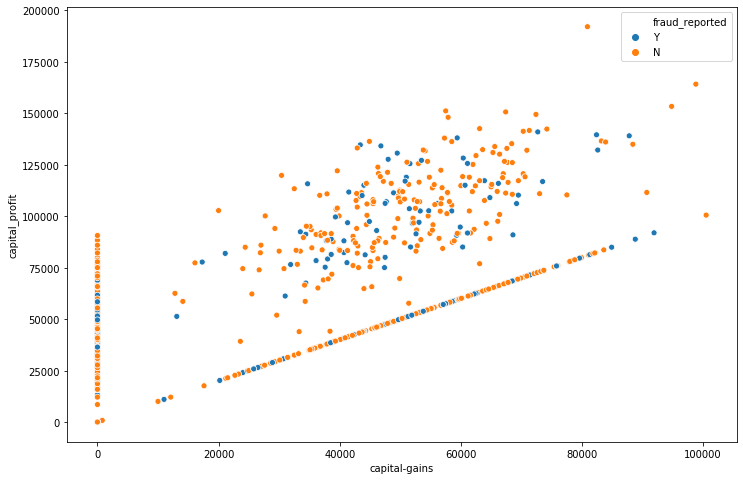

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot('capital-gains','capital_profit',data = df,hue = 'fraud_reported')

In [43]:
# total cases profit
tot_profit = df[['policy_number','capital_profit']].sort_values('capital_profit',ascending = False).head(10)
print('total profit:',df['capital_profit'].sum())
print(tot_profit)

total profit: 51919800
     policy_number  capital_profit
807         250833          192000
533         840806          164100
59          485372          153300
679         774303          151100
353         958785          150600
523         190588          149400
613         831053          148000
846         545506          142500
507         925128          142300
598         507545          141600


In [44]:
# Fraud cases profit
fraud_profit = df_fraud[['policy_number','capital_profit']].sort_values('capital_profit',ascending = False).head(10)
print('total fraud profit:',df_fraud['capital_profit'].sum())
print(fraud_profit)

total fraud profit: 12773900
     policy_number  capital_profit
22          285496          140900
305         771236          139500
517         243226          139000
974         291006          138000
66          356590          134600
946         231548          134100
712         669800          132100
796         728025          130600
476         662256          128200
573         603632          127600


In [45]:
# profit loss by fraud
profit_loss = df_fraud['capital-loss'].sum()
print('profit loss because of  fraud:',profit_loss)

profit loss because of  fraud: -6798100


In [46]:
df_fraud['witnesses'].value_counts()

2    74
1    63
3    60
0    50
Name: witnesses, dtype: int64

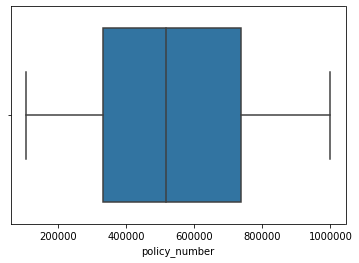

In [47]:
sns.boxplot(df_fraud['policy_number'])

In [48]:
df.Car_model.value_counts()

Sedan       574
SUV         311
Truck        92
Supercar     23
Name: Car_model, dtype: int64

In [49]:
cols_to_drop = ['months_as_customer','policy_bind_date','capital-gains','capital-loss',
                'incident_city','incident_location','incident_date','auto_model','policy_csl','auto_make']

In [50]:
df_model = df.drop(cols_to_drop, axis = 1)

In [51]:
df_model.head()

,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,property_claim,vehicle_claim,auto_year,fraud_reported,agegrp,policy_bind_year,incident_month,auto_make_country,Car_model,capital_profit
0,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,...,13020,52080,2004,Y,"(45, 50]",2014,10,NaN,Sedan,53300
1,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,...,780,3510,2007,Y,"(40, 45]",2006,06,Ger,Sedan,0
2,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,...,3850,23100,2007,N,"(25, 30]",2000,09,Ame,Truck,35100
3,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,...,6340,50720,2014,Y,"(40, 45]",1990,05,Ame,SUV,111300
4,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,...,650,4550,2009,N,"(40, 45]",2014,06,Jan,Sedan,112000


In [52]:
df_model.columns

Index(['age', 'policy_number', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported',
       'agegrp', 'policy_bind_year', 'incident_month', 'auto_make_country',
       'Car_model', 'capital_profit'],
      dtype='object')

In [53]:
df_model.to_csv('df_model.csv',index = None)